In [6]:
"""
This code makes diagnostic plots for raw and postprocessed WRF-Solar output
Postprocessing using the Kalman Filter is from Rafael Alvarenga's code (rafael.alvarenga@etu.univ-guyane.fr)
"""
from file_func import *
from plotting import *
import matplotlib.image as mpimg
import seaborn as sns

In [7]:
li = pd.DataFrame()
method= 'KF'
nb_historical_days = nbhd
for ens in ['ens0','ens1','ens2','ens3','ensmean']:
    for domain in ['d01', 'd02']:
        dir_path_recursive = f'{main_dir_path_recursive}/{ens}/{domain}/{station_name}/{nb_historical_days}_day_{method}'
        all_files = glob.glob(dir_path_recursive + "/*_df.csv")

        for filename in all_files:
            df = pd.read_csv(filename)
            df['rmse_mod'] = fitting(df)[7]
            df['r_mod'] = fitting(df)[0]
            
            df['kfp_rmse'] = fitting_pred(df)[7]
            df['kfp_r'] = fitting_pred(df)[0]
            
            df['kf_rmse'] = kf_fitting_pred(df)[7]
            df['kf_r'] = kf_fitting_pred(df)[0]
   
            li = li.append(df)
            print(filename)


output_junaug/ens2/d01/MO/42_day_KF/ens2_d01_42_day_KF_df.csv
output_junaug/ensmean/d01/MO/42_day_KF/ensmean_d01_42_day_KF_df.csv


In [10]:
li

,Unnamed: 0,Time,CMP22_Total_Solar,SPN1_Total_Solar,SPN1_Diff_Solar,CGR4_IR,dhi,ghi_a,sza,cossza,...,Kc_obs_bias,LT,GHI_pred_kf_only,GHI_pred_improved_fin,rmse_mod,r_mod,kfp_rmse,kfp_r,kf_rmse,kf_r
0,78,2020-06-02 05:30:00+08:00,0.021910,23.498014,18.198788,1218.817498,18.198788,23.498014,89.364776,0.011087,...,318.312146,330,44.672157,44.672157,263.818446,0.733868,216.243217,0.695111,217.184849,0.687674
1,79,2020-06-02 05:40:00+08:00,0.016082,23.694669,18.839558,1218.995382,18.839558,23.694669,87.329351,0.046595,...,11.803204,340,59.562877,59.562877,263.818446,0.733868,216.243217,0.695111,217.184849,0.687674
2,80,2020-06-02 05:50:00+08:00,0.052092,45.740527,26.809797,1220.141132,26.809797,45.740527,85.172973,0.084148,...,1.899225,350,74.453596,74.453596,263.818446,0.733868,216.243217,0.695111,217.184849,0.687674
3,81,2020-06-02 06:00:00+08:00,0.073740,83.262937,29.815790,1221.000874,29.815790,83.262937,82.966751,0.122445,...,0.165653,360,89.344315,89.344315,263.818446,0.733868,216.243217,0.695111,217.184849,0.687674
4,82,2020-06-02 06:10:00+08:00,0.104845,96.432498,34.065631,1221.888542,34.065631,96.432498,80.734649,0.161007,...,0.483934,370,127.934884,127.934884,263.818446,0.733868,216.243217,0.695111,217.184849,0.687674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6448,6526,2020-08-24 17:30:00+08:00,0.006842,13.031749,11.629953,1245.788770,11.629953,13.031749,80.520002,0.164703,...,1.068835,1050,83.462037,83.462037,215.816869,0.704070,212.096569,0.711501,216.926233,0.689598
6449,6527,2020-08-24 17:40:00+08:00,0.009695,12.623990,11.233657,1245.894269,11.233657,12.623990,82.881484,0.123922,...,1.298229,1060,59.471833,59.471833,215.816869,0.704070,212.096569,0.711501,216.926233,0.689598
6450,6528,2020-08-24 17:50:00+08:00,-0.002835,5.284972,4.101292,1243.900849,4.101292,5.284972,85.219265,0.083343,...,2.177793,1070,35.481629,35.481629,215.816869,0.704070,212.096569,0.711501,216.926233,0.689598
6451,6529,2020-08-24 18:00:00+08:00,0.003011,2.643337,1.940742,1243.654620,1.940742,2.643337,87.504768,0.043536,...,3.901120,1080,11.491425,11.491425,215.816869,0.704070,212.096569,0.711501,216.926233,0.689598


In [13]:
######################################
#for ens in ['ens0','ens1','ens2','ens3','ensmean']:
for ens in ['ens2','ensmean']:
    for domain in ['d01']:
        ########################
        df_togr = pd.DataFrame()
        ########################
        def mae_clear(da):
            x_a=np.array(da['ghi_obs'])
            y_a=np.array(da['ghi_clear'])
            xaa = x_a[~np.isnan(x_a)]
            yaa = y_a[~np.isnan(y_a)]
            mae = mean_absolute_error(xaa,yaa)
            return (mae)


        def mae_mod(da):
            x_a=np.array(da['ghi_obs'])
            y_a=np.array(da['ghi_mod'])
            xaa = x_a[~np.isnan(x_a)]
            yaa = y_a[~np.isnan(y_a)]
            mae = mean_absolute_error(xaa,yaa)
            return (mae)

        def mae_kfm(da):
            x_a=np.array(da['ghi_obs'])
            y_a=np.array(da['GHI_pred_kf_only'])
            xaa = x_a[~np.isnan(x_a)]
            yaa = y_a[~np.isnan(y_a)]
            mae = mean_absolute_error(xaa,yaa)
            return (mae)
        
        def rmse_clear(da):
            x_a=np.array(da['ghi_obs'])
            y_a=np.array(da['ghi_clear'])
            xaa = x_a[~np.isnan(x_a)]
            yaa = y_a[~np.isnan(y_a)]
            rmse = mean_squared_error(xaa, yaa, squared=False)
            return (rmse)


        def rmse_mod(da):
            x_a=np.array(da['ghi_obs'])
            y_a=np.array(da['ghi_mod'])
            xaa = x_a[~np.isnan(x_a)]
            yaa = y_a[~np.isnan(y_a)]
            rmse = mean_squared_error(xaa, yaa, squared=False)
            return (rmse)

        def rmse_kfm(da):
            x_a=np.array(da['ghi_obs'])
            y_a=np.array(da['GHI_pred_kf_only'])
            xaa = x_a[~np.isnan(x_a)]
            yaa = y_a[~np.isnan(y_a)]
            rmse = mean_squared_error(xaa, yaa, squared=False)
            return (rmse)
        ########################################
        if domain == 'd01':
            res = 5
        elif domain == 'd02':
            res = 1
        #########################################
        a = prep_input()[0]
        mod_ = prep_input()[1]

        df_clear = prep_opt(mod_, a, ens, domain)[0]

        df_clear = df_clear[['Time', 'ghi_clear']]
        r_input = li[['Time', 'HH','LT','sza', 'ghi_obs', 'ghi_mod', 'GHI_pred_kf_only', 'GHI_pred_improved_fin', 'ens', 'domain', 'flag_clear']]
        #####################################################################
        x = r_input[(r_input['ens'] == ens) & (r_input['domain'] == domain)]
        nb_LTs = len(np.unique(x.LT))
        x =  x.iloc[nb_LTs*nb_historical_days:,:] 
    
        x['Time'] = pd.to_datetime(x['Time']).dt.tz_convert(tz)
        df_togr = x.merge(df_clear,how='inner',on="Time")
        df_togr.to_csv(f'{ens}_{domain}_values.csv')
        df_togr = df_togr[df_togr['ghi_obs'] > 0]
        df_togr = df_togr[df_togr['ghi_mod'] > 0]
        mae_clear = df_togr.groupby('HH').apply(mae_clear).reset_index()
        mae_clear.columns = ['HH','mae_clear']
        mae_mod = df_togr.groupby('HH').apply(mae_mod).reset_index()
        mae_mod.columns = ['HH','mae_mod']
        mae_kf = df_togr.groupby('HH').apply(mae_kfm).reset_index()
        mae_kf.columns = ['HH','mae_kf']

        grby = mae_mod.merge(mae_clear,how='inner',on="HH")
        grby = grby.merge(mae_kf,how='inner',on="HH")
        grby.to_csv(f'{main_dir_path_recursive}/{ens}_{domain}_mae_imprv.csv')
        print(f'{main_dir_path_recursive}/{ens}_{domain}_mae_imprv.csv')
        
        rmse_clear = df_togr.groupby('HH').apply(rmse_clear).reset_index()
        rmse_clear.columns = ['HH','rmse_clear']
        rmse_mod = df_togr.groupby('HH').apply(rmse_mod).reset_index()
        rmse_mod.columns = ['HH','rmse_mod']
        rmse_kf = df_togr.groupby('HH').apply(rmse_kfm).reset_index()
        rmse_kf.columns = ['HH','rmse_kf']

        grby = rmse_mod.merge(rmse_clear,how='inner',on="HH")
        grby = grby.merge(rmse_kf,how='inner',on="HH")
        grby.to_csv(f'{main_dir_path_recursive}/{ens}_{domain}_rmse_imprv.csv')

output_junaug/ens2_d01_mae_imprv.csv
output_junaug/ensmean_d01_mae_imprv.csv


In [46]:
mae_i = pd.DataFrame()
all_files = glob.glob(main_dir_path_recursive + "/*mae_imprv.csv")
for filename in all_files:
    df = pd.read_csv(filename)
    df['ens'] = filename.split('/')[1].split('_')[0]
    df['domain'] = filename.split('/')[1].split('_')[1]
    mae_i = mae_i.append(df)
    print(filename)
mae_i = mae_i[['HH', 'mae_mod', 'mae_clear', 'mae_kf', 'ens', 'domain']]
mae_i['improv_mod'] = (mae_i['mae_clear'] - mae_i['mae_mod']) / mae_i['mae_clear']
mae_i['improv_kf'] = (mae_i['mae_clear'] - mae_i['mae_kf']) / mae_i['mae_clear']
mae_i['improv_modkf'] = (mae_i['mae_mod'] - mae_i['mae_kf']) / mae_i['mae_mod']
mae_i

output_junaug/ens2_d01_mae_imprv.csv
output_junaug/ensmean_d01_mae_imprv.csv


,HH,mae_mod,mae_clear,mae_kf,ens,domain,improv_mod,improv_kf,improv_modkf
0,5,16.048781,13.877803,16.048781,ens2,d01,-0.156435,-0.156435,0.000000
1,6,43.211780,55.828610,43.211780,ens2,d01,0.225992,0.225992,0.000000
2,7,91.020645,161.331966,91.020645,ens2,d01,0.435818,0.435818,0.000000
3,8,149.103686,271.096028,175.706739,ens2,d01,0.449997,0.351865,-0.178420
4,9,208.914384,399.411119,187.840805,ens2,d01,0.476944,0.529706,0.100872
5,10,289.287900,565.335167,216.173319,ens2,d01,0.488290,0.617619,0.252740
6,11,314.296281,683.100894,226.868746,ens2,d01,0.539898,0.667884,0.278169
7,12,309.408292,754.763008,241.982350,ens2,d01,0.590059,0.679393,0.217919
8,13,310.553885,816.035735,253.968460,ens2,d01,0.619436,0.688778,0.182208
9,14,262.678212,730.278279,233.125752,ens2,d01,0.640304,0.680771,0.112504


In [47]:
melted_grby = pd.melt(mae_i, id_vars =['HH','ens','domain'], value_vars =['improv_mod','improv_kf'])
melted_grby.to_csv(f'{main_dir_path_recursive}/improv.csv')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/pyt

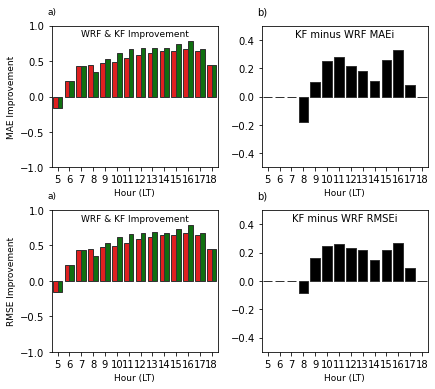

In [49]:

for domain in ['d01']:
    a4_dims = (8,6)
    fig = plt.figure(figsize=a4_dims)
    gs = fig.add_gridspec(2, 7,wspace=1.7,hspace=0.3)

    ticks = [0,1,2,3,4,5,6,7,8,9,10,11]
    labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec',]

    cols=["red", "green"]
    hue_order = ['improv_mod', 'improv_kf']

    ax = fig.add_subplot(gs[0,0:3])
    data = melted_grby[(melted_grby['ens'] == 'ens2') & (melted_grby['domain'] == domain)]
    sns.barplot("HH", "value", data=data,  hue = "variable", hue_order=hue_order,  palette=cols, edgecolor=".2", ci=None)
    plt.legend([], [], frameon=False)
    ax.set(ylim=(-1., 1.))
    plt.ylabel('MAE Improvement', fontsize=9)
    plt.xlabel('Hour (LT)', fontsize=9)
    plt.text(0.,1.1, 'a)', horizontalalignment='center',verticalalignment='center', fontsize=9, transform=ax.transAxes)
    plt.text(0.5,0.94, 'WRF & KF Improvement', horizontalalignment='center',verticalalignment='center', fontsize=9, transform=ax.transAxes)

    
    ax = fig.add_subplot(gs[0,3:6])
    data = mae_i[(mae_i['ens'] == 'ens2') & (mae_i['domain'] == domain)]
    sns.barplot("HH", "improv_modkf", data=data, edgecolor=".2",color='k', ci=None)
    plt.legend([], [], frameon=False)
    ax.set(ylim=(-0.5, 0.5))
    plt.ylabel(' ', fontsize=9)
    plt.xlabel('Hour (LT)', fontsize=9)
    plt.text(0.,1.1, 'b)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    plt.text(0.5,0.94, 'KF minus WRF MAEi', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    
    ax = fig.add_subplot(gs[1,0:3])
    data = melted_grby[(melted_grby_rmse['ens'] == 'ens2') & (melted_grby['domain'] == domain)]
    sns.barplot("HH", "value", data=data,  hue = "variable", hue_order=hue_order,  palette=cols, edgecolor=".2", ci=None)
    plt.legend([], [], frameon=False)
    ax.set(ylim=(-1., 1.))
    plt.ylabel('RMSE Improvement', fontsize=9)
    plt.xlabel('Hour (LT)', fontsize=9)
    plt.text(0.,1.1, 'a)', horizontalalignment='center',verticalalignment='center', fontsize=9, transform=ax.transAxes)
    plt.text(0.5,0.94, 'WRF & KF Improvement', horizontalalignment='center',verticalalignment='center', fontsize=9, transform=ax.transAxes)

    
    ax = fig.add_subplot(gs[1,3:6])
    data = rmse_i[(rmse_i['ens'] == 'ens2') & (rmse_i['domain'] == domain)]
    sns.barplot("HH", "improv_modkf", data=data, edgecolor=".2",color='k', ci=None)
    plt.legend([], [], frameon=False)
    ax.set(ylim=(-0.5, 0.5))
    plt.ylabel(' ', fontsize=9)
    plt.xlabel('Hour (LT)', fontsize=9)
    plt.text(0.,1.1, 'b)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    plt.text(0.5,0.94, 'KF minus WRF RMSEi', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
        
    output_filename = f'{main_dir_path_recursive}/all_improvement_{domain}.png'
    plt.savefig(output_filename, dpi= 300, bbox_inches="tight")

In [ ]:

for domain in ['d01', 'd02']:
    a4_dims = (8,6)
    fig = plt.figure(figsize=a4_dims)
    gs = fig.add_gridspec(2, 7,wspace=0.7,hspace=0.3)

    ticks = [0,1,2,3,4,5,6,7,8,9,10,11]
    labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec',]

    cols=["red", "green"]
    hue_order = ['improv_mod', 'improv_kf']

    ax = fig.add_subplot(gs[0,0:3])
    data = melted_grby[(melted_grby['ens'] == 'ens0') & (melted_grby['domain'] == domain)]
    sns.barplot("HH", "value", data=data,  hue = "variable", hue_order=hue_order,  palette=cols, edgecolor=".2", ci=None)
    plt.legend([], [], frameon=False)
    ax.set(ylim=(-1., 1.))
    plt.ylabel('MAE Improvement', fontsize=9)
    plt.xlabel('', fontsize=9)
    plt.text(0.,1.1, 'a)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    plt.text(0.5,0.9,'ens0', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

    ax = fig.add_subplot(gs[0,3:6])
    data = melted_grby[(melted_grby['ens'] == 'ens1') & (melted_grby['domain'] == domain)]
    sns.barplot("HH", "value", data=data,  hue = "variable", hue_order=hue_order,  palette=cols, edgecolor=".2", ci=None)
    plt.legend([], [], frameon=False)
    ax.set(ylim=(-1., 1.))
    plt.ylabel('', fontsize=9)
    plt.xlabel('', fontsize=9)
    plt.text(0.,1.1, 'b)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    plt.text(0.5,0.9, 'ens1', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

    ax = fig.add_subplot(gs[1,0:3])
    data = melted_grby[(melted_grby['ens'] == 'ens2') & (melted_grby['domain'] == domain)]
    sns.barplot("HH", "value", data=data,  hue = "variable", hue_order=hue_order,  palette=cols, edgecolor=".2", ci=None)
    plt.legend([], [], frameon=False)
    ax.set(ylim=(-1., 1.))
    plt.ylabel('MAE Improvement', fontsize=9)
    plt.xlabel('Hour (LT)', fontsize=9)
    plt.text(0.,1.1, 'c)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    plt.text(0.5,0.9, 'ens2', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

    ax = fig.add_subplot(gs[1,3:6])
    data = melted_grby[(melted_grby['ens'] == 'ens3') & (melted_grby['domain'] == domain)]
    sns.barplot("HH", "value", data=data,  hue = "variable", hue_order=hue_order,  palette=cols, edgecolor=".2", ci=None)
    plt.legend([], [], frameon=False)
    ax.set(ylim=(-1., 1.))
    plt.ylabel('', fontsize=9)
    plt.xlabel('Hour (LT)', fontsize=9)
    plt.text(0.,1.1, 'd)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    plt.text(0.5,0.9, 'ens3', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    output_filename = f'{main_dir_path_recursive}/mae_improvement_{domain}.png'
    plt.savefig(output_filename, dpi= 300, bbox_inches="tight")

In [ ]:

for domain in ['d01', 'd02']:
    a4_dims = (8,6)
    fig = plt.figure(figsize=a4_dims)
    gs = fig.add_gridspec(2, 7,wspace=0.7,hspace=0.3)

    ax = fig.add_subplot(gs[0,0:3])
    data = mae_i[(mae_i['ens'] == 'ens0') & (mae_i['domain'] == domain)]
    sns.barplot("HH", "improv_modkf", data=data, edgecolor=".2",color='k', ci=None)
    plt.legend([], [], frameon=False)
    ax.set(ylim=(-0.5, 0.5))
    plt.ylabel('MAE Improvement', fontsize=9)
    plt.xlabel('', fontsize=9)
    plt.text(0.,1.1, 'a)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    plt.text(0.5,0.9,'ens0', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

    ax = fig.add_subplot(gs[0,3:6])
    data = mae_i[(mae_i['ens'] == 'ens1') & (mae_i['domain'] == domain)]
    sns.barplot("HH", "improv_modkf", data=data, edgecolor=".2",color='k', ci=None)
    plt.legend([], [], frameon=False)
    ax.set(ylim=(-0.5, 0.5))
    plt.ylabel('', fontsize=9)
    plt.xlabel('', fontsize=9)
    plt.text(0.,1.1, 'b)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    plt.text(0.5,0.9, 'ens1', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

    ax = fig.add_subplot(gs[1,0:3])
    data = mae_i[(mae_i['ens'] == 'ens2') & (mae_i['domain'] == domain)]
    sns.barplot("HH", "improv_modkf", data=data, edgecolor=".2",color='k', ci=None)
    plt.legend([], [], frameon=False)
    ax.set(ylim=(-0.5, 0.5))
    plt.ylabel('MAE Improvement', fontsize=9)
    plt.xlabel('Hour (LT)', fontsize=9)
    plt.text(0.,1.1, 'c)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    plt.text(0.5,0.9, 'ens2', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

    ax = fig.add_subplot(gs[1,3:6])
    data = mae_i[(mae_i['ens'] == 'ens3') & (mae_i['domain'] == domain)]
    sns.barplot("HH", "improv_modkf", data=data, edgecolor=".2",color='k', ci=None)
    plt.legend([], [], frameon=False)
    ax.set(ylim=(-0.5, 0.5))
    plt.ylabel('', fontsize=9)
    plt.xlabel('Hour (LT)', fontsize=9)
    plt.text(0.,1.1, 'd)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    plt.text(0.5,0.9, 'ens3', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    output_filename = f'{main_dir_path_recursive}/mae_improvement_modkf_{domain}.png'
    plt.savefig(output_filename, dpi= 300, bbox_inches="tight")

In [ ]:
d1 = mae_i[mae_i['domain'] == 'd01']
d1 = d1[['HH', 'improv_mod', 'ens']]
d1.columns = ['HH', 'improv_mod_d1', 'ens']
d2 = mae_i[mae_i['domain'] == 'd02']
d2 = d2[['HH', 'improv_mod', 'ens']]
d2.columns = ['HH', 'improv_mod_d2', 'ens']

dom_merge = d1.merge(d2,how='inner',on=['HH', 'ens' ])
dom_merge['improv_domain'] = (dom_merge['improv_mod_d1'] - dom_merge['improv_mod_d2']) / dom_merge['improv_mod_d1']
dom_merge.min()

In [ ]:

a4_dims = (8,6)
fig = plt.figure(figsize=a4_dims)
gs = fig.add_gridspec(2, 7,wspace=0.7,hspace=0.3)

ax = fig.add_subplot(gs[0,0:3])
data = dom_merge[(dom_merge['ens'] == 'ens0')]
sns.barplot("HH", "improv_domain", data=data, edgecolor=".2",color='k', ci=None)
plt.legend([], [], frameon=False)
ax.set(ylim=(-1., 2.))
plt.ylabel('MAE Improvement', fontsize=9)
plt.xlabel('', fontsize=9)
plt.text(0.,1.1, 'a)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
plt.text(0.5,0.9,'ens0', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

ax = fig.add_subplot(gs[0,3:6])
data = dom_merge[(dom_merge['ens'] == 'ens1')]
sns.barplot("HH", "improv_domain", data=data, edgecolor=".2",color='k', ci=None)
plt.legend([], [], frameon=False)
ax.set(ylim=(-1., 2.))
plt.ylabel('', fontsize=9)
plt.xlabel('', fontsize=9)
plt.text(0.,1.1, 'b)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
plt.text(0.5,0.9, 'ens1', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

ax = fig.add_subplot(gs[1,0:3])
data = dom_merge[(dom_merge['ens'] == 'ens2')]
sns.barplot("HH", "improv_domain", data=data, edgecolor=".2",color='k', ci=None)
plt.legend([], [], frameon=False)
ax.set(ylim=(-1., 2.))
plt.ylabel('MAE Improvement', fontsize=9)
plt.xlabel('Hour (LT)', fontsize=9)
plt.text(0.,1.1, 'c)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
plt.text(0.5,0.9, 'ens2', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

ax = fig.add_subplot(gs[1,3:6])
data = dom_merge[(dom_merge['ens'] == 'ens3')]
sns.barplot("HH", "improv_domain", data=data, edgecolor=".2",color='k', ci=None)
plt.legend([], [], frameon=False)
ax.set(ylim=(-1., 2.))
plt.ylabel('', fontsize=9)
plt.xlabel('Hour (LT)', fontsize=9)
plt.text(0.,1.1, 'd)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
plt.text(0.5,0.9, 'ens3', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
output_filename = f'{main_dir_path_recursive}/mae_improvement_domain.png'
plt.savefig(output_filename, dpi= 300, bbox_inches="tight")

In [43]:
rmse_i = pd.DataFrame()
all_files = glob.glob(main_dir_path_recursive + "/*rmse_imprv.csv")
for filename in all_files:
    df = pd.read_csv(filename)
    df['ens'] = filename.split('/')[1].split('_')[0]
    df['domain'] = filename.split('/')[1].split('_')[1]
    rmse_i = rmse_i.append(df)
    print(filename)
rmse_i = rmse_i[['HH', 'rmse_mod', 'rmse_clear', 'rmse_kf', 'ens', 'domain']]
rmse_i['improv_mod'] = (rmse_i['rmse_clear'] - rmse_i['rmse_mod']) / rmse_i['rmse_clear']
rmse_i['improv_kf'] = (rmse_i['rmse_clear'] - rmse_i['rmse_kf']) / rmse_i['rmse_clear']
rmse_i['improv_modkf'] = (rmse_i['rmse_mod'] - rmse_i['rmse_kf']) / rmse_i['rmse_mod']
rmse_i

output_junaug/ens2_d01_rmse_imprv.csv
output_junaug/ensmean_d01_rmse_imprv.csv


,HH,rmse_mod,rmse_clear,rmse_kf,ens,domain,improv_mod,improv_kf,improv_modkf
0,5,23.004601,20.581052,23.004601,ens2,d01,-0.117756,-0.117756,0.000000
1,6,56.366720,75.433271,56.366720,ens2,d01,0.252760,0.252760,0.000000
2,7,117.656536,204.569322,117.656536,ens2,d01,0.424857,0.424857,0.000000
3,8,191.550591,348.770156,207.753828,ens2,d01,0.450783,0.404325,-0.084590
4,9,268.077562,480.182957,224.268416,ens2,d01,0.441718,0.532952,0.163420
5,10,354.202710,662.842101,267.541411,ens2,d01,0.465630,0.596372,0.244666
6,11,388.330065,776.214959,287.438523,ens2,d01,0.499713,0.629692,0.259809
7,12,379.609334,850.800286,291.191941,ens2,d01,0.553821,0.657743,0.232917
8,13,384.582189,892.999893,300.922466,ens2,d01,0.569337,0.663021,0.217534
9,14,323.863968,794.224757,276.083270,ens2,d01,0.592226,0.652386,0.147533


In [44]:
melted_grby_rmse = pd.melt(rmse_i, id_vars =['HH','ens','domain'], value_vars =['improv_mod','improv_kf'])
melted_grby_rmse.to_csv(f'{main_dir_path_recursive}/improv_rmse.csv')

In [28]:
rmse_i[rmse_i['domain'] == 'd01']

,HH,rmse_mod,rmse_clear,rmse_kf,ens,domain,improv_mod,improv_kf,improv_modkf
0,5,21.063765,24.723746,21.063765,ens0,d01,0.148035,0.148035,0.000000
1,6,66.514875,107.808385,66.514875,ens0,d01,0.383027,0.383027,0.000000
2,7,136.737652,257.005791,136.737652,ens0,d01,0.467959,0.467959,0.000000
3,8,223.756210,397.839450,190.526286,ens0,d01,0.437572,0.521098,0.148510
4,9,303.612767,465.421608,230.855585,ens0,d01,0.347661,0.503986,0.239638
...,...,...,...,...,...,...,...,...,...
9,14,268.011313,270.601295,260.794804,ensmean,d01,0.009571,0.036240,0.026926
10,15,207.067076,210.827743,195.445367,ensmean,d01,0.017838,0.072962,0.056125
11,16,138.071377,130.216628,108.658429,ensmean,d01,-0.060321,0.165556,0.213027
12,17,66.692564,56.494538,60.050219,ensmean,d01,-0.180513,-0.062938,0.099596


In [25]:
d1 = rmse_i[rmse_i['domain'] == 'd01']
d1 = d1[['HH', 'improv_mod', 'ens']]
d1.columns = ['HH', 'improv_mod_d1', 'ens']
d2 = rmse_i[rmse_i['domain'] == 'd02']
d2 = d2[['HH', 'improv_mod', 'ens']]
d2.columns = ['HH', 'improv_mod_d2', 'ens']

dom_merge = d1.merge(d2,how='inner',on=['HH', 'ens' ])
dom_merge['improv_domain'] = (dom_merge['improv_mod_d1'] - dom_merge['improv_mod_d2']) / dom_merge['improv_mod_d1']
dom_merge.max()

HH                     18
improv_mod_d1    0.568416
ens               ensmean
improv_mod_d2    0.558991
improv_domain    1.557863
dtype: object

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/pyt

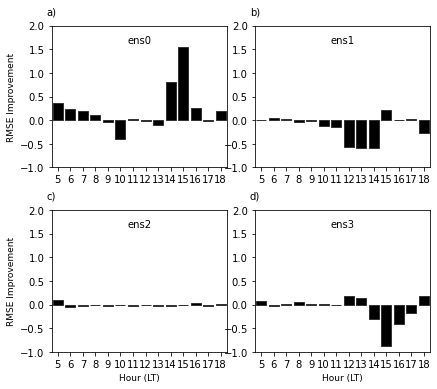

In [27]:

a4_dims = (8,6)
fig = plt.figure(figsize=a4_dims)
gs = fig.add_gridspec(2, 7,wspace=0.7,hspace=0.3)

ax = fig.add_subplot(gs[0,0:3])
data = dom_merge[(dom_merge['ens'] == 'ens0')]
sns.barplot("HH", "improv_domain", data=data, edgecolor=".2",color='k', ci=None)
plt.legend([], [], frameon=False)
ax.set(ylim=(-1., 2.))
plt.ylabel('RMSE Improvement', fontsize=9)
plt.xlabel('', fontsize=9)
plt.text(0.,1.1, 'a)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
plt.text(0.5,0.9,'ens0', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

ax = fig.add_subplot(gs[0,3:6])
data = dom_merge[(dom_merge['ens'] == 'ens1')]
sns.barplot("HH", "improv_domain", data=data, edgecolor=".2",color='k', ci=None)
plt.legend([], [], frameon=False)
ax.set(ylim=(-1., 2.))
plt.ylabel('', fontsize=9)
plt.xlabel('', fontsize=9)
plt.text(0.,1.1, 'b)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
plt.text(0.5,0.9, 'ens1', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

ax = fig.add_subplot(gs[1,0:3])
data = dom_merge[(dom_merge['ens'] == 'ens2')]
sns.barplot("HH", "improv_domain", data=data, edgecolor=".2",color='k', ci=None)
plt.legend([], [], frameon=False)
ax.set(ylim=(-1., 2.))
plt.ylabel('RMSE Improvement', fontsize=9)
plt.xlabel('Hour (LT)', fontsize=9)
plt.text(0.,1.1, 'c)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
plt.text(0.5,0.9, 'ens2', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

ax = fig.add_subplot(gs[1,3:6])
data = dom_merge[(dom_merge['ens'] == 'ens3')]
sns.barplot("HH", "improv_domain", data=data, edgecolor=".2",color='k', ci=None)
plt.legend([], [], frameon=False)
ax.set(ylim=(-1., 2.))
plt.ylabel('', fontsize=9)
plt.xlabel('Hour (LT)', fontsize=9)
plt.text(0.,1.1, 'd)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
plt.text(0.5,0.9, 'ens3', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
output_filename = f'{main_dir_path_recursive}/rmse_improvement_domain.png'
plt.savefig(output_filename, dpi= 300, bbox_inches="tight")